In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [9]:
df = pd.read_csv('../Data/data_processed_final.csv')

# for convenience
df.set_index('original_title', inplace=True)


In [10]:
border = df['goodness_factor'].mean() + 0.5*df['goodness_factor'].std() 
print(f'Borderline for good/bad movie is: {border}')

#Comparison between two groups?
bad_movies = df.loc[df['goodness_factor']<border]
good_movies = df.loc[df['goodness_factor']>=border]
    

Borderline for good/bad movie is: 7.479509992784861


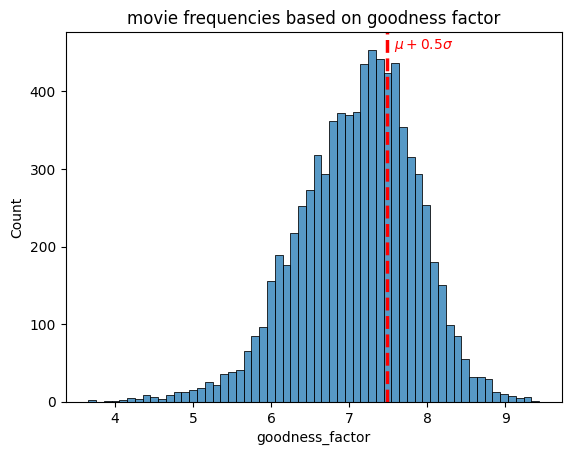

In [11]:
sns.histplot(df['goodness_factor'])
plt.axvline(x=border, color='red', ls='--', 
        lw=2.5)
style = dict(size=10, color='red')
plt.text(x=border+0.1, y=455, s='$\mu+0.5\sigma$', **style)
plt.title('movie frequencies based on goodness factor')
plt.show()


Comparison between TMDB's 'popularity' and our goodness factor. First we need to scale the data so its comparable.

/home/artkoski/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/artkoski/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/artkoski/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/artkoski/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2331 (\N{DEVANAGARI LETTER CHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/artkoski/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io

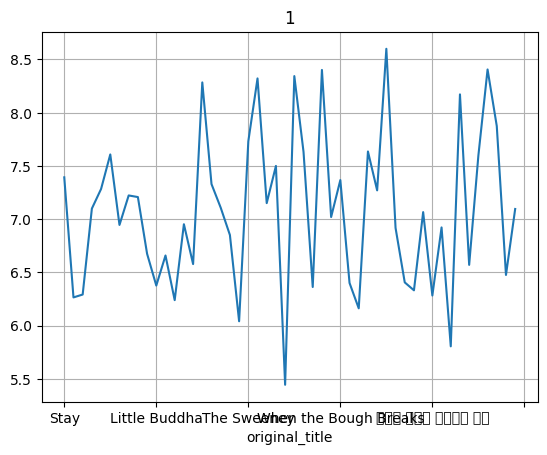

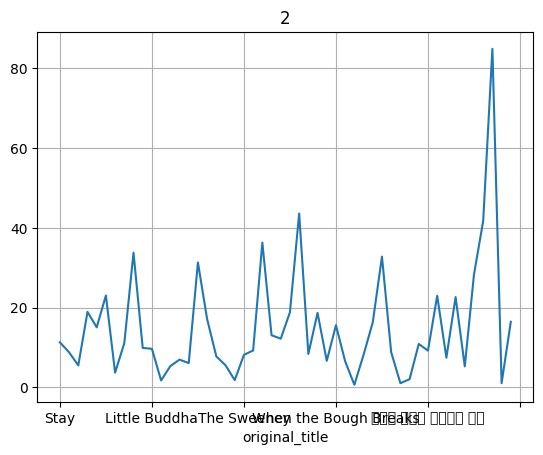

In [16]:
tmpr_data = df[['goodness_factor', 'popularity']].copy()
data_sample = tmpr_data.sample(n=50)
data_sample['goodness_factor'].plot(grid=True, title='1')
plt.show()
data_sample['popularity'].plot(grid=True, title='2')
plt.show()

Trying to scale 'popularity' here down to 1-10

In [ ]:
min_val, max_val = min(df['popularity']), max(df['popularity'])
tmpr_data['popularity_scaled'] = df['popularity'].apply(lambda x: 10*(x-min_val)/(max_val-min_val))

tmpr_data_2 = tmpr_data[['goodness_factor', 'popularity_scaled']]

tmpr_data_2.sample(n=50).plot(grid=True, title='SCALED 0-10')
plt.show()
print(tmpr_data.sort_values(by='goodness_factor'))
print(tmpr_data.sort_values(by='popularity'))
print(tmpr_data.describe())

print(f'Correlation between the two: {tmpr_data.corr()}')
